In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Dataset shape: (607346, 22)

First 5 rows:
   DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  OP_CARRIER_AIRLINE_ID  \
0             1            3                EV                  20366   
1             1            3                EV                  20366   
2             1            3                EV                  20366   
3             1            3                EV                  20366   
4             1            3                EV                  20366   

  OP_CARRIER TAIL_NUM  OP_CARRIER_FL_NUM  ORIGIN_AIRPORT_ID  \
0         EV   N48901               4397              13930   
1         EV   N16976               4401              15370   
2         EV   N12167               4404              11618   
3         EV   N14902               4405              10781   
4         EV   N606UX               4407              14524   

   ORIGIN_AIRPORT_SEQ_ID ORIGIN  ...  DEST  DEP_TIME DEP_DEL15  DEP_TIME_BLK  \
0                1393007    ORD  ...   GRB    1003.0       

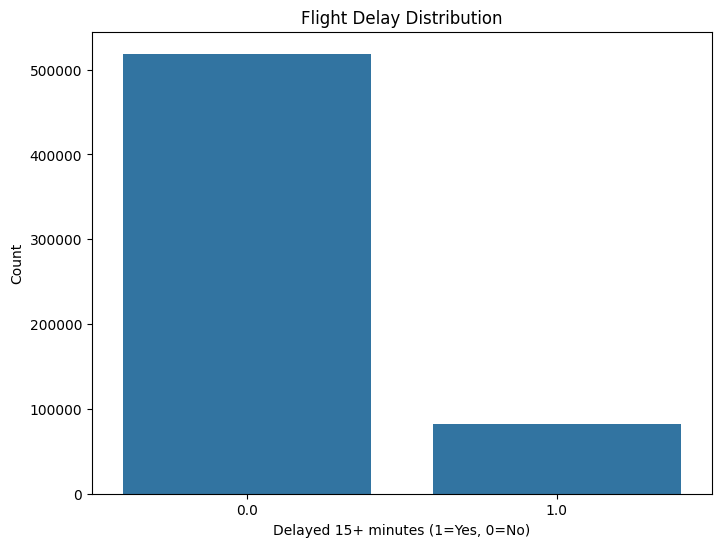

In [2]:
# Loading the dataset
data = pd.read_csv("../data/Jan_2020_ontime.csv")

# Basic data exploration
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
print(data.head())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Simple visualization of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='DEP_DEL15', data=data)
plt.title('Flight Delay Distribution')
plt.xlabel('Delayed 15+ minutes (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

In [3]:
# Data preprocessing
data = data.dropna(subset=['DEP_TIME', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'DEST', 'DEP_DEL15'])

features = [
    'DAY_OF_WEEK',
    'OP_UNIQUE_CARRIER',
    'DEP_TIME'          
]

# Create a simple derived feature - departure hour
data['DEP_HOUR'] = data['DEP_TIME'].apply(lambda x: int(x/100))
features.append('DEP_HOUR')

# Prepare features and target
X = data[features]
y = data['DEP_DEL15']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = ['DEP_TIME', 'DEP_HOUR', 'DAY_OF_WEEK']
categorical_features = ['OP_UNIQUE_CARRIER']


Model Evaluation:
Accuracy: 0.8638891201198702

Confusion Matrix:
[[103779      0]
 [ 16351      0]]

Classification Report:


c:\Users\eshan\Desktop\ML\Assigment\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\eshan\Desktop\ML\Assigment\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\eshan\Desktop\ML\Assigment\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93    103779
         1.0       0.00      0.00      0.00     16351

    accuracy                           0.86    120130
   macro avg       0.43      0.50      0.46    120130
weighted avg       0.75      0.86      0.80    120130



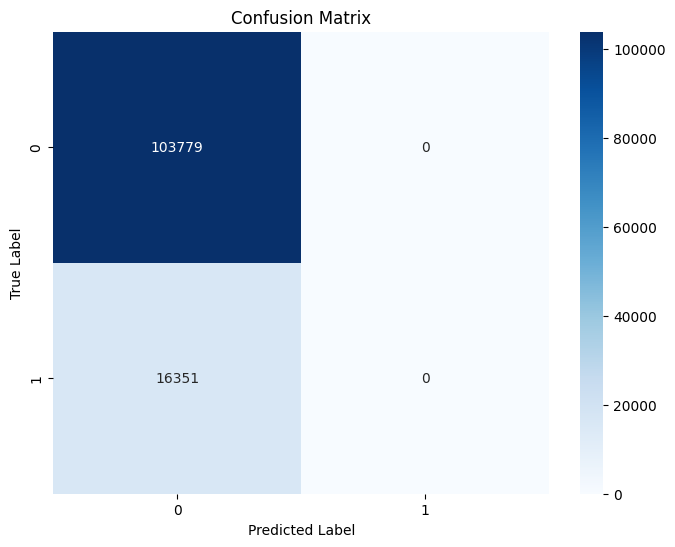

In [4]:
# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline with preprocessing and model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Model Training
model_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Result Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()